In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
dataset=pd.read_csv('train_ctrUa4K.csv')
dataset2=pd.read_csv('test_lAUu6dG.csv')

In [83]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
dataset=dataset.drop(['Loan_ID'],axis=1)
name=dataset2.iloc[:,0].values
dataset2=dataset2.drop(['Loan_ID'],axis=1)

In [85]:
dataset=dataset.fillna(dataset.mode().iloc[0])
dataset2=dataset2.fillna(dataset2.mode().iloc[0])
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<AxesSubplot:xlabel='Gender', ylabel='Count'>

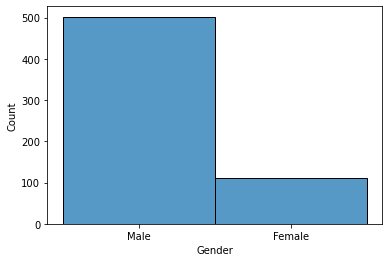

In [88]:
import seaborn as sns
sns.histplot(x='Gender',data=dataset)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

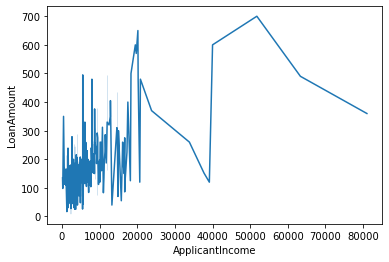

In [89]:
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=dataset)

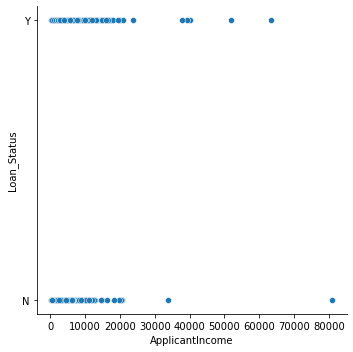

In [90]:
sns.relplot(x='ApplicantIncome',y='Loan_Status',data=dataset)

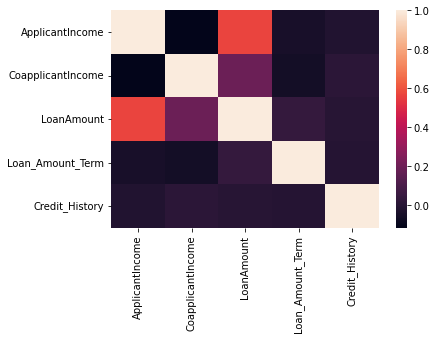

In [91]:
tc = dataset.corr()
sns.heatmap(tc)
plt.show()

In [92]:
y=dataset.iloc[:,-1].values
dataset=dataset.drop('Loan_Status',axis=1)
dataset = pd.get_dummies(dataset, columns = ['Dependents','Married','Education','Self_Employed','Property_Area', 'Gender','Self_Employed'])
dataset2 = pd.get_dummies(dataset2, columns = ['Dependents','Married','Education','Self_Employed','Property_Area', 'Gender','Self_Employed'])

In [93]:
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,120.0,360.0,1.0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0


In [94]:
dataset2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3,2340,2546,100.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
4,3276,0,78.0,360.0,1.0,1,0,0,0,1,...,1,1,0,0,0,1,0,1,1,0


In [151]:
X=dataset.iloc[:,:].values
X_tt=dataset2.iloc[:,:].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [96]:
dataset.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
610,4106,0.0,40.0,180.0,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
612,7583,0.0,187.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
613,4583,0.0,133.0,360.0,0.0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training data with various algorithms

# Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20  23]
 [  2 109]]


0.8376623376623377

y_pred=classifier.predict(X_tt)
y_ff=[]
for i in range(len(y_pred)):
    if(y_pred[i]==1):
        y_ff.append('Y')
    else:
        y_ff.append('N')

# checking what value of n_estimatior to use

0.8181818181818182 24


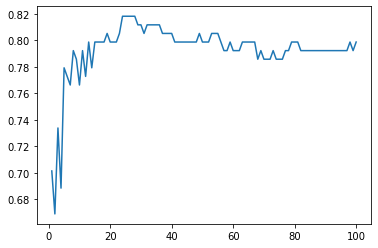

In [105]:
acc=[]
n=[]
max_acc=0
best_n=0
for i in range(0,100):
    classifier = RandomForestClassifier(n_estimators = i+1, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    accu=accuracy_score(y_test, y_pred)
    n.append(i+1)
    acc.append(accuracy_score(y_test, y_pred))
    if(accu>max_acc):
        max_acc=accu
        best_n=i+1
        
print(max_acc,best_n)
plt.plot(n,acc)

# KNN algo

0.7857142857142857 24


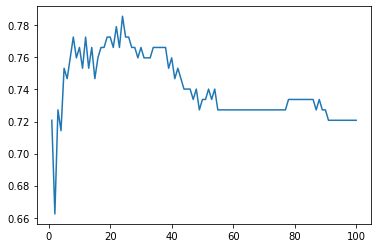

In [106]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
n=[]
max_acc=0
best_n=0
for i in range(0,100):
    classifier = KNeighborsClassifier(n_neighbors = i+1, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    accu=accuracy_score(y_test, y_pred)
    n.append(i+1)
    acc.append(accuracy_score(y_test, y_pred))
    if(accu>max_acc):
        max_acc=accu
        best_n=i+1
        
print(max_acc,best_n)
plt.plot(n,acc)

In [152]:
#using n estimators=24
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X_tt = sc.transform(X_tt)
classifier = RandomForestClassifier(n_estimators = 24, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
y_pred=classifier.predict(X_tt)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X_tt = sc.transform(X_tt)
classifier = 
classifier.fit(X, y)
y_pred=classifier.predict(X_tt)

# ANN 

In [132]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8696
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8609
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8587
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8609
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.8674
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8652
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8652
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8696
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8674
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8674
Epoch 11/50
15/15 [

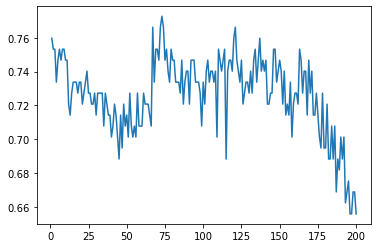

In [138]:
acc=[]
n=[]
max_acc=0
best_n=0
for i in range(0,200):
    classifier =ann.fit(X_train, y_train, batch_size = 32, epochs = 50+i)
    y_pred = ann.predict(X_test)
    y_pred = (y_pred > 0.5)
    accu=accuracy_score(y_test, y_pred)
    n.append(i+1)
    acc.append(accuracy_score(y_test, y_pred))
    if(accu>max_acc):
        max_acc=accu
        best_n=50+i
        
print(max_acc,best_n)
plt.plot(n,acc)

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X_tt = sc.transform(X_tt)

ann.fit(X, y, batch_size = 32, epochs = 122)
y_pred = ann.predict(X_tt)
y_pred = (y_pred > 0.5)

Epoch 1/122
20/20 [==============================] - 1s 2ms/step - loss: 1.4208 - accuracy: 0.8241
Epoch 2/122
20/20 [==============================] - 0s 1ms/step - loss: 1.2588 - accuracy: 0.7980
Epoch 3/122
20/20 [==============================] - 0s 1ms/step - loss: 1.3122 - accuracy: 0.7915
Epoch 4/122
20/20 [==============================] - 0s 993us/step - loss: 0.9697 - accuracy: 0.8160
Epoch 5/122
20/20 [==============================] - 0s 992us/step - loss: 0.9151 - accuracy: 0.8046
Epoch 6/122
20/20 [==============================] - 0s 1ms/step - loss: 0.8549 - accuracy: 0.8062
Epoch 7/122
20/20 [==============================] - 0s 1ms/step - loss: 0.7834 - accuracy: 0.8143
Epoch 8/122
20/20 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.8160
Epoch 9/122
20/20 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.8176
Epoch 10/122
20/20 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.8225
Epoch

In [153]:
y_ff=[]
for i in range(len(y_pred)):
    if(y_pred[i]==True):
        y_ff.append('Y')
    else:
        y_ff.append('N')

In [154]:
df = pd.DataFrame({'Loan_ID':name,'Loan_Status':y_ff})

In [155]:
df.to_csv('file1.csv',index=False)

In [156]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [7]:
x=20*np.random.rand(1000,5)-10

In [8]:
x

array([[ 6.49644979,  3.70176239, -1.13112012,  5.42355185,  3.01748866],
       [-4.62664563,  6.42973786, -9.30264145, -9.02366962,  8.6021373 ],
       [-4.66258667, -1.41266842, -7.87277175, -5.5872218 , -1.8605028 ],
       ...,
       [ 8.22988947,  9.28021955,  2.77769104, -1.8192187 , -9.63923481],
       [-8.19436126,  8.58411747,  7.14659857, -5.3001788 , -0.5241787 ],
       [ 0.18401981, -8.77989722,  6.7629843 ,  7.71893419,  9.74776289]])